In [16]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from utils import *
import os
import sys




%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

sys.path.append('../../network')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Load data

In [17]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


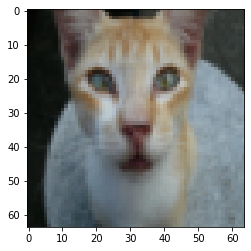

In [18]:
# Example of a picture
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [19]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [20]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## Model

In [21]:
import sys
sys.path.append('../../network')
from main_class import *
from layers import *
from loss_functions import *

In [22]:
#train_x=np.loadtxt('./datasets/train_x.csv', delimiter=",")
#train_y=np.loadtxt('./datasets/train_y.csv', delimiter=",")
#test_x=np.loadtxt('./datasets/test_x.csv', delimiter=",")
#test_y=np.loadtxt('./datasets/test_y.csv', delimiter=",")

#train_y = train_y[np.newaxis,:]
#test_y = test_y[np.newaxis,:]

In [23]:
n_x = 12288     # num_px * num_px * 3
n_h1 = 4
n_h2 = 7
n_h3 = 5
n_y = 1

md=NeuralNetwork(CrossEntropy)
np.random.seed(1)
lr = 0.0075

md.add(Dense(n_h1, input_shape=(n_x,), initializer = 'ng', lr = lr))
md.add(Activation('relu'))

md.add(Dense(n_h2, initializer = 'ng', lr = lr))
md.add(Activation('relu'))

md.add(Dense(n_h3, initializer = 'ng', lr = lr))
md.add(Activation('relu'))

md.add(Dense(n_y, initializer = 'ng', lr = lr))
md.add(Activation('sigmoid'))

train, val = md.fit(train_x, train_y, n_epochs=2400, batch_size=32)

100%|██████████| 2400/2400 [00:23<00:00, 101.14it/s]


In [24]:
pred =md.predict(train_x)
pred=(pred >=0.5)
np.mean((pred == train_y))

1.0

In [25]:
pred_test =md.predict(test_x)>=0.5
np.mean((pred_test == test_y))

0.76

##  6) Results Analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

In [26]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))
        
       

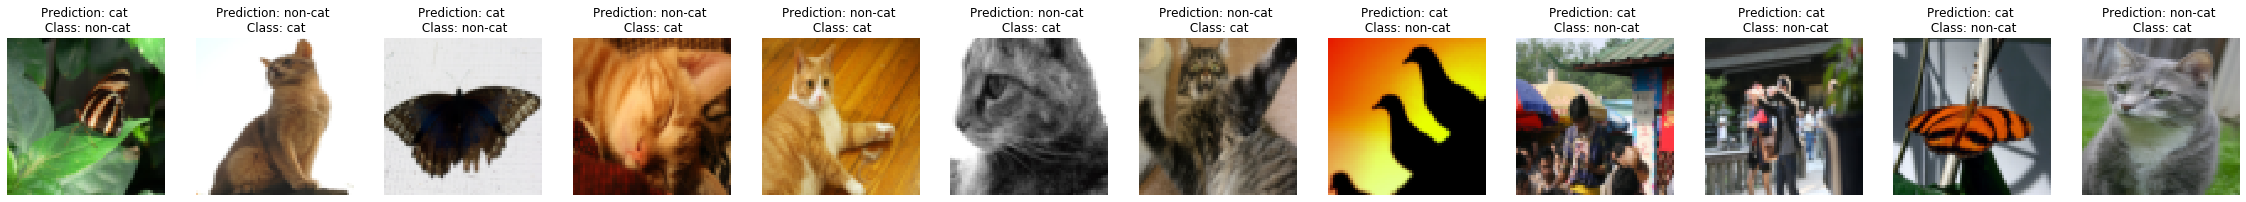

In [27]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

## 7) Test with your own image 


/Users/rene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
/Users/rene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


y = 1.077113600908629e-05, your predicts a "non-cat" picture.


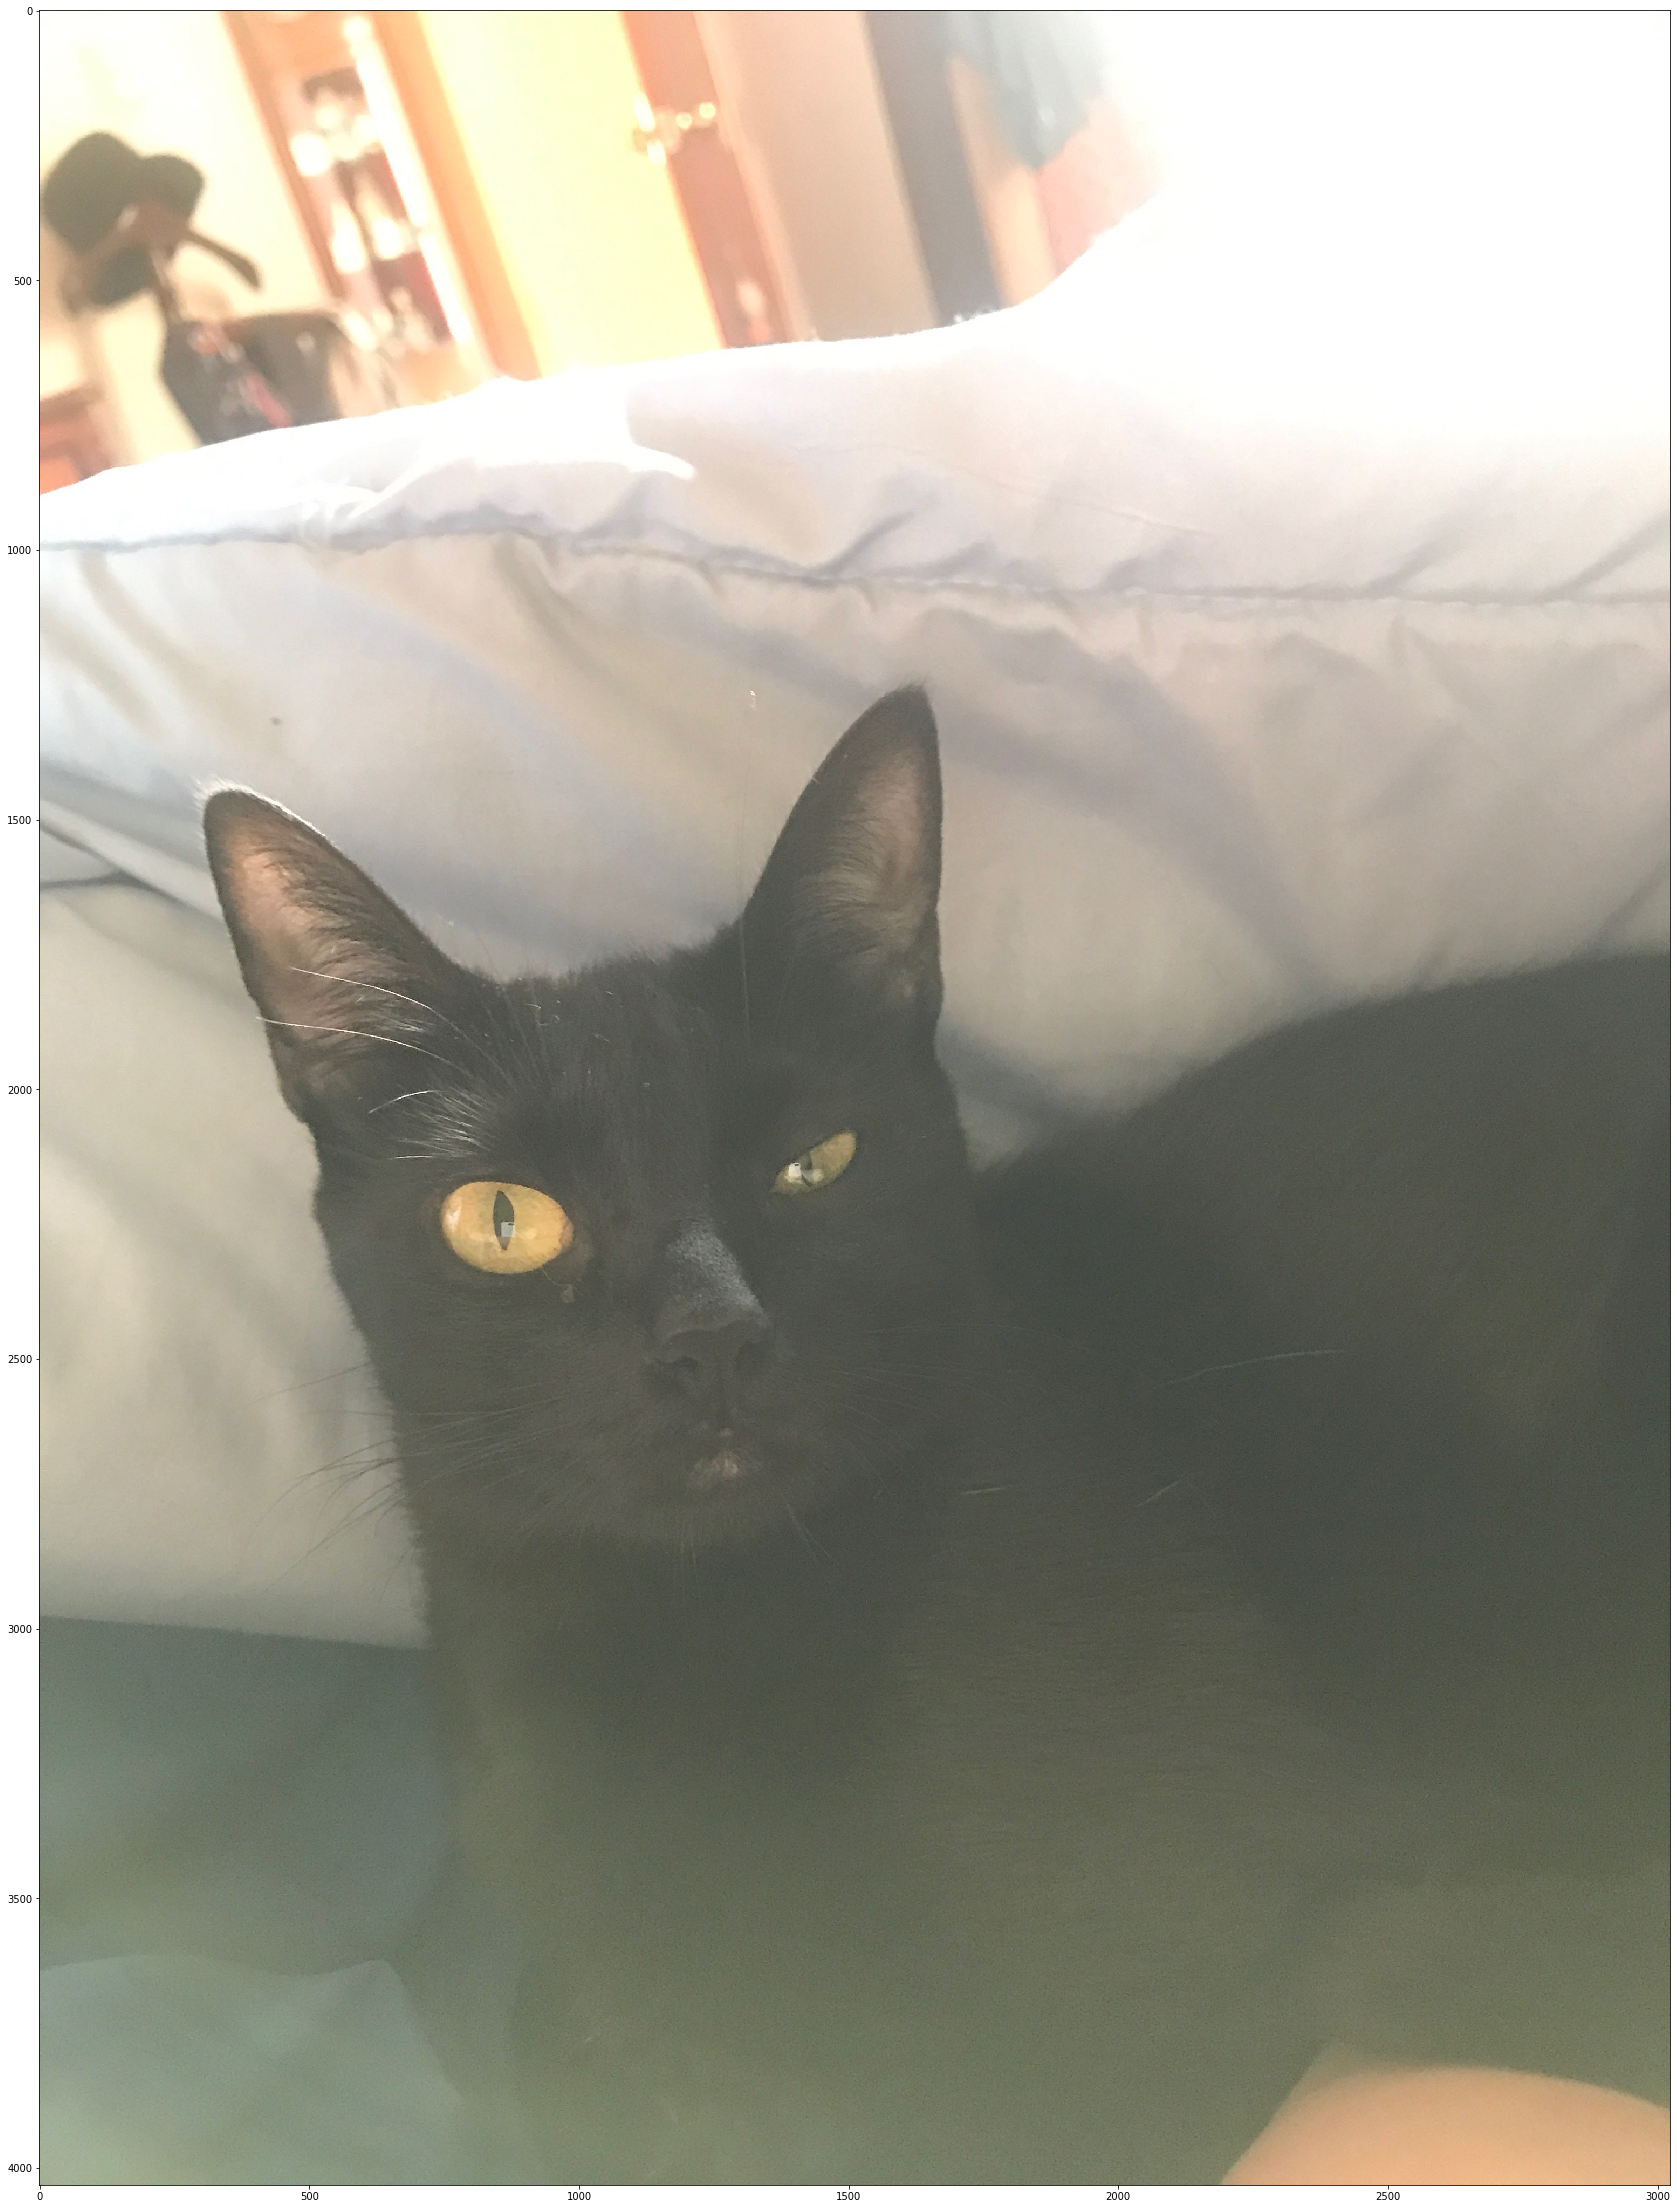

In [31]:
## START CODE HERE ##
my_image = "my_image5.jpg" # change this to the name of your image file 
my_label_y = 1 # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = md.predict(my_image)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")